# Lab 5

Aditya Kharosekar amk3587
Rahul Jain rj8656


# Chapter 4 Problem 10

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

In [304]:
weekly = pd.read_csv("Weekly.csv")

In [305]:
weekly.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [306]:
weekly.shape

(1089, 10)

** NEED TO DO NUMERICAL/GRAPHICAL SUMMARIES **

## Logistic Regression on all data

In [307]:
logReg = LogisticRegression()
testing = weekly.loc[:,"Lag1":"Volume"]
testing.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,0.712,3.514,-2.576,-0.270,0.816,0.153728


In [308]:
logReg.fit(testing, weekly["Direction"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [309]:
testing.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214


The matrix shows the result of describe() on the matrix made up of the predictor variables. All 5 Lag variables are very similar to each other. The Volume variable, by its nature, has a different structure, but just based on the above matrix, it is hard to say whether any of these variables are by themselves statistically significant.

## Confusion Matrix

In [310]:
results = logReg.predict(testing)
print(results.shape)
results

(1089,)


array(['Up', 'Up', 'Up', ..., 'Up', 'Up', 'Up'], dtype=object)

In [311]:
print(confusion_matrix(weekly["Direction"], results))

[[ 55 429]
 [ 47 558]]


Figuring out which row corresponds to "Up" and which row corresponds to "Down" - 

In [312]:
up_correct = 0
up_predicted_as_down = 0
for num in range(1089):
    if (weekly["Direction"][num]=="Up" and results[num]=="Up"):
        up_correct+=1
    if (weekly["Direction"][num]=="Up" and results[num]=="Down"):
        up_predicted_as_down +=1
print(up_correct)
print(up_predicted_as_down)

558
47


Interpretation of the confusion matrix - 
55 Downs and 558 Ups are predicted correctly. 47 Ups are predicted as downs and 429 Downs are predicted as ups.

Overall fraction of correct predictions - (55+558)/ (47+429+55+558) = 0.563

## Logistic Regression tested on 1990-2008 data

In [313]:
pre_2009 = weekly.loc[:984, :]
pre_2009.tail()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
980,981,2008,12.026,-8.389,-6.198,-3.898,10.491,5.841565,-2.251,Down
981,982,2008,-2.251,12.026,-8.389,-6.198,-3.898,6.093950,0.418,Up
982,983,2008,0.418,-2.251,12.026,-8.389,-6.198,5.932454,0.926,Up
983,984,2008,0.926,0.418,-2.251,12.026,-8.389,5.855972,-1.698,Down
984,985,2008,-1.698,0.926,0.418,-2.251,12.026,3.087105,6.760,Up


This doesn't seem a great way to separate the pre-2009 data from the rest but for now, this is how I will do it. I will change this when I figure out how to do this a better way

In [314]:
post_2009 = weekly.loc[985:, :]
post_2009.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
985,986,2009,6.760,-1.698,0.926,0.418,-2.251,3.793110,-4.448,Down
986,987,2009,-4.448,6.760,-1.698,0.926,0.418,5.043904,-4.518,Down
987,988,2009,-4.518,-4.448,6.760,-1.698,0.926,5.948758,-2.137,Down
988,989,2009,-2.137,-4.518,-4.448,6.760,-1.698,6.129763,-0.730,Down
989,990,2009,-0.730,-2.137,-4.518,-4.448,6.760,5.602004,5.173,Up


In [315]:
lag2_training  = pre_2009["Lag2"]
lag2_training.shape

(985,)

In [316]:
lag2_training = np.reshape(lag2_training, (985, 1)) # to get rid of a deprecation warning
new_logistic_regr = LogisticRegression()
new_logistic_regr.fit(lag2_training, pre_2009["Direction"])

C:\Users\Aditya Kharosekar\Documents\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:224: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [317]:
lag2_testing = post_2009["Lag2"]
lag2_testing.shape

(104,)

In [318]:
lag2_testing = np.reshape(lag2_testing, (104, 1))
new_results = new_logistic_regr.predict(lag2_testing)
print(confusion_matrix(post_2009["Direction"], new_results))

[[ 9 34]
 [ 5 56]]


C:\Users\Aditya Kharosekar\Documents\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:224: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


Assuming the same row-wise interpretation of the confusion matrix as before, the interpretation of the matrix is as follows - 
9 Downs and 56 Ups are predicted correctly. 5 Ups are predicted as Downs and 34 Downs are predicted as Ups.
Overall fraction of correct predictions = (9+34)/(9+34+5+56) = 0.413

## Linear Discriminant Analysis

In [319]:
lag2_training.shape

(985, 1)

In [320]:
lda = LDA()
lda.fit(lag2_training, pre_2009["Direction"])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [321]:
lda_results = lda.predict(lag2_testing)

In [322]:
print(confusion_matrix(post_2009["Direction"], lda_results))

[[ 9 34]
 [ 5 56]]


This is the exact same confusion matrix as the last logistic regression model. Let's see if both the models have the same predictions for each instance.

In [323]:
x1 = new_logistic_regr.predict_log_proba(lag2_training)
x2 = lda.predict_log_proba(lag2_training)
for num in range(5): #printing out only the first few
    print(x1[num], x2[num])

[-0.85074208 -0.55704038] [-0.85097261 -0.55686856]
[-0.82583009 -0.57602457] [-0.82621748 -0.57572292]
[-0.79087438 -0.60412607] [-0.79147622 -0.60362703]
[-0.719923   -0.66706965] [-0.72093726 -0.66610856]
[-0.91688866 -0.5104272 ] [-0.91668814 -0.51056077]


As the log probabilities returned by both these models are not the same, the fact that both these models return the same confusion matrix is not an issue.

Interpretration of the confusion matrix - 
9 Downs and 56 Ups are predicted correctly. 5 Ups are predicted as Downs and 34 Downs are predicted as Ups. Overall fraction of correct predictions = (9+34)/(9+34+5+56) = 0.413

## QDA

In [324]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(lag2_training, pre_2009["Direction"])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [325]:
qda_results = qda.predict(lag2_testing)
print(confusion_matrix(post_2009["Direction"], qda_results))

[[ 0 43]
 [ 0 61]]


61 Ups are predicted correctly and 43 Downs are predicted as Ups. So it looks like this model is predicting everything as an Up. I am not sure if this is supposed to happen.

Overall fraction of accurate predictions - 61/104 = 0.59

## KNN

In [326]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn.fit(lag2_training, pre_2009["Direction"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [327]:
knn_results = knn.predict(lag2_testing)
print(confusion_matrix(post_2009["Direction"], knn_results))

[[16 27]
 [22 39]]


16 Downs are predicted correctly and 39 Ups are predicted correctly. 22 Ups are predicted as Downs and 27 Downs are predicted as Ups.

Overall fraction of accurate predictions - (16+39)/(16+39+22+27) = 0.53

QDA seems to provide the best results with an accuracy of 0.59

# Chapter 5 Problem 5

In [328]:
default = pd.read_csv("Default.csv")
import random

In [329]:
random.seed() #setting random seed

In [330]:
default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [331]:
X = default.loc[:,"balance":"income"]
X.head()

,balance,income
0,729.526495,44361.62507
1,817.180407,12106.13470
2,1073.549164,31767.13895
3,529.250605,35704.49394
4,785.655883,38463.49588


In [332]:
y = default["default"]
print(y.shape)
y.head()

(10000,)


0    No
1    No
2    No
3    No
4    No
Name: default, dtype: object

### With default train/test split (75% train, 25% test)

In [333]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [334]:
logistic_regr = LogisticRegression()
logistic_regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [335]:
logistic_results = logistic_regr.predict(X_test)

In [336]:
logistic_results.shape

(2500,)

In [337]:
y_test.shape

(2500,)

In [338]:
y_test = pd.Series(y_test)

In [339]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, logistic_results)
print(accuracy)

0.9644


In [340]:
print("Validation error: ", 1-accuracy)

Validation error:  0.0356


## Now with 3 different data splits

### First, I will try a 50-50 train test split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [342]:
X_train.shape, X_test.shape

((5000, 2), (5000, 2))

In [343]:
logistic_regr = LogisticRegression()
logistic_regr.fit(X_train, y_train)
logistic_results = logistic_regr.predict(X_test)

In [344]:
accuracy = accuracy_score(y_test, logistic_results)
accuracy

0.96579999999999999

In [345]:
print("Validation error: ", 1-accuracy)

Validation error:  0.0342


### Now, I will try a 65% train - 35% test split

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)
X_train.shape, X_test.shape

((6500, 2), (3500, 2))

In [347]:
logistic_regr = LogisticRegression()
logistic_regr.fit(X_train, y_train)
logistic_results = logistic_regr.predict(X_test)
accuracy = accuracy_score(y_test, logistic_results)
accuracy

0.96799999999999997

In [348]:
print("Validation error: ", 1-accuracy)

Validation error:  0.032


### Finally I will try a 35% train - 65% test split

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.65)
X_train.shape, X_test.shape

((3500, 2), (6500, 2))

In [350]:
logistic_regr = LogisticRegression()
logistic_regr.fit(X_train, y_train)
logistic_results = logistic_regr.predict(X_test)
accuracy = accuracy_score(y_test, logistic_results)
accuracy

0.96769230769230774

In [351]:
print("Validation error: ", 1-accuracy)

Validation error:  0.0323076923077


** Comment on results **

Using dummy variable for student

In [352]:
X2 = default.loc[:,"student" :"income"]
X2.head()

,student,balance,income
0,No,729.526495,44361.62507
1,Yes,817.180407,12106.13470
2,No,1073.549164,31767.13895
3,No,529.250605,35704.49394
4,No,785.655883,38463.49588


In [353]:
X2=  pd.get_dummies(X2, columns = {"student"})
X2.head()

,balance,income,student_No,student_Yes
0,729.526495,44361.62507,1,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,1,0
3,529.250605,35704.49394,1,0
4,785.655883,38463.49588,1,0


In [354]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.25)
X_train.shape, X_test.shape

((7500, 4), (2500, 4))

In [355]:
logistic_regr = LogisticRegression()
logistic_regr.fit(X_train, y_train)
logistic_results = logistic_regr.predict(X_test)
accuracy = accuracy_score(y_test, logistic_results)
accuracy

0.96719999999999995

The original 75-25 split without including student data had an accuracy of .95. So there is a negligible improvement when including the student infromation. 

## Chapter 6 Problem 9

In [356]:
college = pd.read_csv("College.csv")
college.shape
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [357]:
X = college.drop("Apps", axis=1)
y = college["Apps"]
X = X.loc[:, "Private":"Grad.Rate"]

In [358]:
X.head()

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [359]:
X = pd.get_dummies(X, columns = ["Private"])
X.head()

,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_No,Private_Yes
0,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1
1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,1
2,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,1
3,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0,1
4,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,1


In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Using Least Squares Regression

In [361]:
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [362]:
from sklearn.metrics import mean_squared_error
test_error = mean_squared_error(y_test, ols.predict(X_test))
print(test_error)

1937495.65076


### Using Ridge Regression Model with CV

In [363]:
from sklearn.linear_model import RidgeCV

In [364]:
ridge = RidgeCV(alphas = (0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10), cv=5)
ridge.fit(X_train, y_train)

RidgeCV(alphas=(0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10), cv=5,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [365]:
test_error = mean_squared_error(y_test, ridge.predict(X_test))
print(test_error)

1940897.56066


### Using Lasso Regression with CV

In [366]:
from sklearn.linear_model import LassoCV

In [367]:
lasso = LassoCV(alphas = (0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10), cv=5)
lasso.fit(X_train, y_train)

LassoCV(alphas=(0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10), copy_X=True, cv=5,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [368]:
test_error = mean_squared_error(y_test, lasso.predict(X_test))
print(test_error)

1954605.32366


In [369]:
count = 0
for num in range(len(lasso.coef_)):
    if lasso.coef_[num]==0.0:
        count+=1
print(lasso.coef_)
print("There are",len(lasso.coef_)-count, "non-zero coefficients")

[  1.69521372e+00  -1.25603372e+00   4.40146072e+01  -8.04604794e+00
   7.96463516e-02   9.29587658e-02  -1.03174639e-01   1.50365606e-01
   1.12976747e-01  -1.72720322e-02  -7.86928680e+00  -4.50398355e-01
   8.53858113e+00  -1.49289917e+00   5.14422421e-02   7.47109360e+00
   1.70751229e+02  -0.00000000e+00]
There are 17 non-zero coefficients


### Using PCR

#### First doing PCA

In [370]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, cross_val_score

In [371]:
pca = PCA()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [372]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [373]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 32.14,  58.69,  65.4 ,  71.14,  76.35,  80.96,  84.44,  87.79,
        90.86,  93.54,  95.7 ,  97.29,  98.34,  99.01,  99.52,  99.84,
       100.  , 100.  ])

So it seems like the first 9 components explain most of the variance in the dataset (more than 90%)

In [374]:
n = len(X_reduced_train)
kf_10 = KFold(n_splits = 10, shuffle = True)

In [375]:
mse = []
regr = LinearRegression()

In [376]:
#Calculating PCA with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring="neg_mean_squared_error").mean()
mse.append(score)

In [377]:
print(len(pca.components_))

18


There are 18 principal components in total

In [378]:
X_reduced = pca.fit_transform(scale(X), y)
for i in np.arange(1, 19):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring="neg_mean_squared_error").mean()
    mse.append(score)

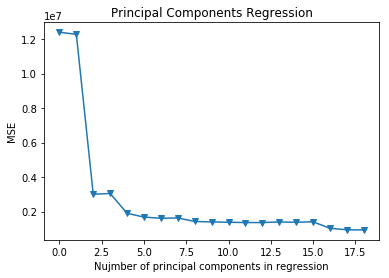

In [379]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(mse, '-v')
ax1.set_title("Principal Components Regression")
ax1.set_xlabel("Nujmber of principal components in regression")
ax1.set_ylabel('MSE')
# ax2.plot(range(0, 19), mse, '-v')
# ax2.set_title('Intercept excluded from plot')

# for ax in fig.axes:
#     ax.set_xlabel('Number of principal components in regression')
#     ax.set_ylabel('MSE')
#     ax.set_xlim((-0.2,5.2))

plt.show()

As seen in the above graph, the lowest MSE is when M=18. But this is almost same as doing regular least squares regression. There isn't any reduction going on.

So, I decided to calculate the MSE for a value of M which would do some substantial reduction of the data. For M=6 till M=14, the MSE almost stays constant (there isn't much variation). I therefore decided on M=6 as if the MSE doesn't vary much, a lower dimension is preferred.

In [380]:
X_reduced_test = pca.transform(scale(X_test))[:,:7]
# Train regression model on training data
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)
# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

6243276.3274332006

This MSE is the same magnitude as that of the Linear, Ridge, and Lasso regression models. However, it is substantial greater than them.

## Using Partial Least Squares

In [384]:
from sklearn.cross_decomposition import PLSRegression

In [385]:
mse = []
kf_10 = KFold(n_splits=10, shuffle=True)

C:\Users\Aditya Kharosekar\Documents\Anaconda\lib\site-packages\sklearn\cross_decomposition\pls_.py:319: UserWarning: X scores are null at iteration 17
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\Aditya Kharosekar\Documents\Anaconda\lib\site-packages\sklearn\cross_decomposition\pls_.py:319: UserWarning: X scores are null at iteration 17
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\Aditya Kharosekar\Documents\Anaconda\lib\site-packages\sklearn\cross_decomposition\pls_.py:319: UserWarning: X scores are null at iteration 17
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\Aditya Kharosekar\Documents\Anaconda\lib\site-packages\sklearn\cross_decomposition\pls_.py:319: UserWarning: X scores are null at iteration 17
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\Aditya Kharosekar\Documents\Anaconda\lib\site-packages\sklearn\cross_decomposition\pls_.py:319: UserWarning: X scores are null at iteration 17
  warnings.w

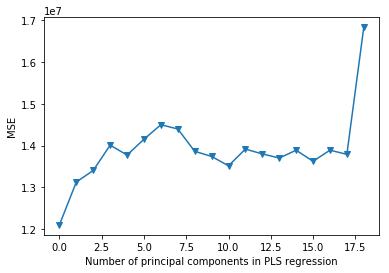

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
for i in np.arange(1, 19):
    pls = PLSRegression(n_components=i, scale=True)
    pls.fit(X_train,y_train)
    score = -1*cross_val_score(pls, X_test, y_test, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(np.arange(0, 19), np.array(mse[0:19]), '-v')
plt.xlabel('Number of principal components in PLS regression')
plt.ylabel('MSE')
plt.show()

As seen in the above graph, the MSE is least when M=10

In [391]:
pls15 = PLSRegression(n_components = 10)
pls15.fit(X_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=10, scale=True, tol=1e-06)

In [392]:
mean_squared_error(y_test, pls15.predict(X_test))

12402224.053573677

In [ ]:
pls7 = PLSRegression

# Chapter 6 Question 11

In [393]:
boston = pd.read_csv("Boston.csv")

In [394]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [395]:
X = boston.loc[:, "zn":"medv"]
y = boston["crim"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Trying Ridge Regression

In [396]:
ridge = RidgeCV(alphas = (0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10), cv=5)
ridge.fit(X_train, y_train)

RidgeCV(alphas=(0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10), cv=5,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [397]:
test_error = mean_squared_error(y_test, ridge.predict(X_test))
print(test_error)

31.1696044869


## Trying Lasso Regression

In [398]:
lasso = LassoCV(alphas = (0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10), cv=5)
lasso.fit(X_train, y_train)

LassoCV(alphas=(0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10), copy_X=True, cv=5,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [399]:
test_error = mean_squared_error(y_test, lasso.predict(X_test))
print(test_error)

30.134735215


## Trying subset selection using feature selection

In [401]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [403]:
X_train_new = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)

ValueError: Unknown label type: (array([  3.29820000e-01,   1.96570000e-01,   8.64476000e+00,
         2.90900000e-01,   7.50300000e-02,   4.12380000e-01,
         1.10874000e+01,   1.43337000e+01,   2.29690000e-01,
         5.05900000e-02,   6.11540000e-01,   1.84982000e+01,
         8.30800000e-02,   6.86000000e-02,   9.55770000e-01,
         2.28760000e-01,   8.24809000e+00,   8.52040000e-01,
         2.59150000e-01,   6.41700000e-02,   1.02330000e+01,
         5.47900000e-02,   1.10270000e-01,   3.76800000e-02,
         8.71675000e+00,   2.98190000e-01,   2.63548000e+00,
         5.44520000e-01,   5.87205000e+00,   8.15174000e+00,
         4.26131000e+00,   4.59000000e-02,   8.38700000e-02,
         4.64689000e+00,   5.40500000e-01,   2.61690000e-01,
         8.05579000e+00,   1.71340000e-01,   5.69175000e+00,
         1.19294000e+00,   8.89762000e+01,   1.35540000e-01,
         2.07460000e-01,   3.53700000e-02,   7.02259000e+00,
         5.66637000e+00,   1.35870000e-01,   6.12900000e-02,
         1.90730000e-01,   1.61282000e+00,   4.81900000e-02,
         1.00080000e-01,   2.54300000e-02,   4.81213000e+00,
         4.29700000e-02,   4.55587000e+00,   2.10380000e-01,
         1.34284000e+00,   2.72900000e-02,   1.43900000e-02,
         2.44953000e+00,   3.56868000e+00,   1.30100000e-02,
         2.36862000e+00,   3.57800000e-02,   1.29320000e-01,
         2.98500000e-02,   2.06080000e-01,   4.34879000e+00,
         6.26300000e-02,   5.34120000e-01,   4.29400000e-02,
         3.76619000e+01,   1.00623000e+01,   3.87100000e-02,
         3.04100000e-02,   6.72400000e-02,   9.82349000e+00,
         1.20742000e+00,   6.15100000e-02,   1.54450000e-01,
         8.98296000e+00,   4.11300000e-02,   1.06120000e-01,
         6.37960000e-01,   5.60200000e-02,   1.67600000e-01,
         3.69695000e+00,   7.89600000e-02,   2.39120000e-01,
         1.62864000e+00,   3.84970000e+00,   2.81838000e+00,
         4.37900000e-02,   4.89822000e+00,   1.64390000e-01,
         1.27570000e-01,   5.20580000e-01,   1.80028000e+00,
         1.39134000e+01,   2.31390000e+00,   5.73116000e+00,
         4.87141000e+00,   5.29305000e+00,   2.50461000e+01,
         9.18702000e+00,   5.37200000e-02,   2.21880000e-01,
         4.22239000e+00,   6.32000000e-03,   4.01100000e-02,
         8.37000000e-02,   9.88430000e-01,   9.92485000e+00,
         4.68400000e-02,   1.30580000e-01,   3.51140000e-01,
         1.36781000e+01,   9.84900000e-02,   8.87300000e-02,
         9.72418000e+00,   1.62110000e-01,   7.25800000e-01,
         6.71772000e+00,   8.01400000e-02,   6.28807000e+00,
         8.81250000e-01,   4.92980000e-01,   7.95000000e-02,
         1.40520000e-01,   9.06000000e-03,   7.72990000e-01,
         3.58090000e-01,   1.41500000e-01,   3.52330000e-01,
         3.39830000e-01,   6.89900000e-02,   1.04690000e-01,
         1.70900000e-02,   6.71910000e-01,   3.15000000e-02,
         7.16500000e-02,   1.25790000e-01,   4.54192000e+00,
         3.30450000e-01,   3.65900000e-02,   3.03470000e-01,
         9.60400000e-02,   2.83920000e-01,   3.54800000e-02,
         4.07710000e-01,   9.37800000e-02,   1.10690000e-01,
         2.00900000e-02,   6.04700000e-02,   1.88110000e+01,
         5.02300000e-02,   1.22472000e+01,   1.06718000e+01,
         8.24400000e-02,   1.43200000e-02,   1.32620000e-01,
         6.23560000e-01,   9.51200000e-02,   9.23230000e+00,
         2.33099000e+00,   6.90500000e-02,   7.83932000e+00,
         1.65660000e+00,   4.56000000e-02,   3.22640000e-01,
         8.70700000e-02,   7.01300000e-02,   1.38799000e+00,
         7.88600000e-02,   2.87500000e-02,   1.00245000e+00,
         4.52700000e-02,   3.70500000e-02,   2.45220000e-01,
         2.15505000e+00,   1.13081000e+00,   1.15172000e+00,
         7.97800000e-02,   2.48017000e+01,   1.59360000e-01,
         5.82115000e+00,   9.16400000e-02,   8.49213000e+00,
         3.87350000e-01,   5.78000000e-02,   3.46600000e-02,
         4.09740000e+00,   1.87000000e-02,   4.15292000e+01,
         1.23290000e-01,   5.50070000e-01,   2.49800000e-01,
         5.20177000e+00,   9.10300000e-02,   6.64200000e-02,
         9.25200000e-02,   7.84200000e-01,   3.67822000e+00,
         6.39312000e+00,   3.40060000e-01,   7.40389000e+00,
         1.46336000e+00,   2.89600000e-01,   1.81590000e-01,
         7.36711000e+00,   1.58760000e-01,   1.42362000e+01,
         6.12700000e-02,   8.82900000e-02,   9.51363000e+00,
         5.11830000e-01,   5.18800000e-02,   2.37857000e+00,
         6.29760000e-01,   2.53870000e-01,   3.69311000e+00,
         3.49400000e-01,   1.42310000e-01,   3.18270000e-01,
         3.53501000e+00,   3.41090000e-01,   1.83377000e+00,
         7.05042000e+00,   6.96215000e+00,   2.99160000e-01,
         7.87500000e-02,   2.20511000e+01,   1.83370000e-01,
         5.42500000e-02,   9.29900000e-02,   6.56650000e-01,
         1.27440000e-01,   5.66998000e+00,   1.22690000e-01,
         1.77800000e-02,   7.35341000e+01,   7.15100000e-02,
         3.50200000e-02,   9.06500000e-02,   4.42228000e+00,
         5.37000000e-01,   1.33598000e+01,   4.03841000e+00,
         3.47428000e+00,   1.50100000e-02,   1.44550000e-01,
         8.22100000e-02,   5.82401000e+00,   1.02900000e-01,
         3.44500000e-02,   1.31170000e-01,   2.86558000e+01,
         4.33700000e-02,   7.52601000e+00,   1.74460000e-01,
         2.24236000e+00,   5.26930000e-01,   2.14918000e+00,
         9.17800000e-02,   2.18700000e-02,   5.78900000e-02,
         2.51990000e-01,   6.44405000e+00,   2.25971000e+01,
         6.63510000e-01,   8.40540000e-01,   4.66883000e+00,
         1.23247000e+00,   2.24890000e-01,   2.68380000e-01,
         7.85700000e-01,   1.41385000e+00,   5.66000000e-02,
         2.22120000e-01,   5.20140000e-01,   1.38100000e-02,
         8.26725000e+00,   6.88800000e-02,   4.30100000e-02,
         1.36000000e-02,   3.32105000e+00,   5.73500000e-02,
         3.25430000e-01,   3.83684000e+00,   3.73800000e-02,
         1.68118000e+01,   3.11300000e-02,   1.13290000e-01,
         1.28023000e+01,   2.44668000e+00,   4.75470000e-01,
         6.79208000e+01,   8.26500000e-02,   1.73310000e-01,
         1.78667000e+01,   5.30200000e-02,   1.70040000e-01,
         1.49320000e-01,   1.00840000e-01,   3.77498000e+00,
         2.79570000e-01,   1.91860000e-01,   8.19900000e-02,
         3.23700000e-02,   1.53800000e-02,   1.55757000e+01,
         3.51000000e-02,   2.43938000e+01,   7.75223000e+00,
         1.78990000e-01,   5.64600000e-02,   1.39140000e-01,
         4.66600000e-02,   5.36000000e-02,   1.14250000e-01,
         8.02710000e-01,   5.40110000e-01,   9.91655000e+00,
         1.49632000e+00,   1.80846000e+01,   1.08342000e+01,
         1.88360000e-01,   5.90050000e-01,   2.41030000e-01,
         1.17470000e-01,   1.44383000e+01,   4.41780000e-01,
         9.76170000e-01,   2.11240000e-01,   1.39600000e-01,
         6.21100000e-02,   1.11081000e+01,   2.29270000e-01,
         1.44208000e+01,   6.65492000e+00,   1.18123000e+01,
         7.02200000e-02,   1.96091000e+01,   1.25179000e+00,
         1.07930000e-01,   8.44700000e-02,   3.15330000e-01,
         2.36482000e+01,   2.53560000e-01,   2.05500000e-02,
         2.89900000e-02,   6.91100000e-02,   2.37934000e+00,
         4.41700000e-02,   1.41030000e-01,   3.04900000e-02,
         3.93200000e-02,   9.32909000e+00,   9.96654000e+00,
         1.30751000e+01,   2.89550000e-01,   1.91330000e-01,
         4.75237000e+00,   2.92400000e+00,   2.63630000e-01,
         2.17190000e-01,   9.39063000e+00,   2.17700000e-02,
         9.59571000e+00,   2.14090000e-01,   4.74100000e-02,
         6.58800000e-02,   6.27390000e-01,   1.19511000e+01,
         6.80117000e+00,   9.26600000e-02,   8.18700000e-02,
         3.61500000e-02]),)